### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = '/Users/lechu/Desktop/Task_6'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path,'PreparedData', 'case_vaccination_combined.csv'),index_col = False)

### Data Cleaning 

In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'cases', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,date,cases,people_vaccinated,people_fully_vaccinated,daily_vaccinations
0,0,2020-01-23,0.0,0.0,0.0,NaN
1,1,2020-01-24,0.0,0.0,0.0,NaN
2,2,2020-01-25,0.0,0.0,0.0,NaN
3,3,2020-01-26,0.0,0.0,0.0,NaN
4,4,2020-01-27,1.0,0.0,0.0,NaN


In [7]:
df.tail()

,Unnamed: 0,date,cases,people_vaccinated,people_fully_vaccinated,daily_vaccinations
517,517,2021-06-23,1135.0,44113902.0,28120827.0,847607.0
518,518,2021-06-24,475.0,44648853.0,28667869.0,831545.0
519,519,2021-06-25,751.0,45074295.0,29208662.0,821290.0
520,520,2021-06-26,488.0,45225940.0,29482055.0,818832.0
521,521,2021-06-27,336.0,45320460.0,29684139.0,818388.0


In [8]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [9]:
df.isnull().sum()

date                         0
cases                        0
people_vaccinated            0
people_fully_vaccinated      0
daily_vaccinations         339
dtype: int64

In [10]:
df.dropna(inplace = True)


#### Scatterplot 

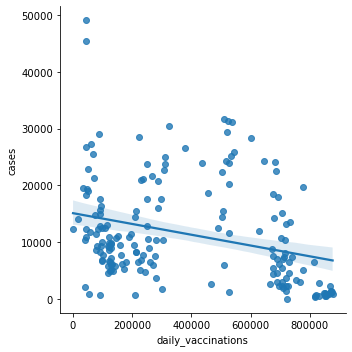

In [11]:
# Create a scatterplot for the "daily_vaccinations" and "total_vaccinations" columns in seaborn

sns.lmplot( x = 'daily_vaccinations',y = 'cases', data = df)

As the vaccination rate increases the number of covid 19 cases decreases.

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['daily_vaccinations'].values.reshape(-1,1)
y = df['cases'].values.reshape(-1,1)

In [13]:
X

array([[     0.],
       [ 18098.],
       [ 34400.],
       [ 44333.],
       [ 45754.],
       [ 41740.],
       [ 42798.],
       [ 39910.],
       [ 43925.],
       [ 44217.],
       [ 44071.],
       [ 44783.],
       [ 50095.],
       [ 51907.],
       [ 53826.],
       [ 57033.],
       [ 60809.],
       [ 67827.],
       [ 71990.],
       [ 76126.],
       [ 75744.],
       [ 77430.],
       [ 79517.],
       [ 85322.],
       [ 88264.],
       [ 91323.],
       [ 92827.],
       [ 96965.],
       [ 96966.],
       [ 98076.],
       [ 95037.],
       [ 91692.],
       [ 89837.],
       [ 90613.],
       [ 90764.],
       [ 92109.],
       [ 96313.],
       [101217.],
       [108877.],
       [114885.],
       [120573.],
       [121445.],
       [120923.],
       [119361.],
       [119630.],
       [118552.],
       [119992.],
       [121229.],
       [123181.],
       [124879.],
       [127215.],
       [127243.],
       [126726.],
       [126797.],
       [127205.],
       [12

In [14]:
y

array([[12399.],
       [14004.],
       [19466.],
       [49044.],
       [19367.],
       [ 2117.],
       [10903.],
       [10356.],
       [12320.],
       [18349.],
       [26663.],
       [45333.],
       [19077.],
       [22824.],
       [  948.],
       [11706.],
       [27210.],
       [25566.],
       [21343.],
       [ 8593.],
       [14817.],
       [11484.],
       [ 9253.],
       [12233.],
       [29003.],
       [ 8277.],
       [16366.],
       [12430.],
       [10078.],
       [ 6887.],
       [ 9387.],
       [15636.],
       [14883.],
       [12831.],
       [17518.],
       [  748.],
       [ 6668.],
       [ 7690.],
       [12487.],
       [13032.],
       [10835.],
       [ 8632.],
       [ 6670.],
       [ 4650.],
       [ 5728.],
       [ 9246.],
       [ 9928.],
       [ 9197.],
       [ 6484.],
       [ 4838.],
       [ 5132.],
       [ 5890.],
       [ 9598.],
       [ 9845.],
       [ 9050.],
       [ 7162.],
       [ 6094.],
       [ 4984.],
       [ 5764.

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis
 

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

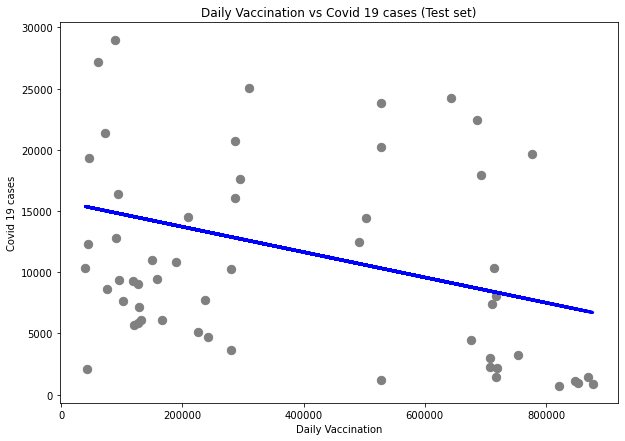

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.subplots(figsize=(10, 7))
plot_test.scatter(X_test, y_test, color='gray', s = 70)

plot_test.plot(X_test, y_predicted, color='blue',linewidth = 3)
plot_test.title('Daily Vaccination vs Covid 19 cases (Test set)')
plot_test.xlabel('Daily Vaccination')
plot_test.ylabel('Covid 19 cases')
plot_test.show()

In [23]:
plot_test.savefig(os.path.join(path, 'Visualization','linear_reggresion.png'))

<Figure size 432x288 with 0 Axes>

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0103391]]
Mean squared error:  56262385.010820456
R2 score:  0.046854117562144526


* The variables have a negative relationship as the coefficient is negative. The slope here means that as X rises (as the daily vaccination increases), y slightly drops (covid 19 cases) at a degree of 0.0103391.

*  The MSE is very large . It sayS that a regression may not be the best model to represent this data and can’t accurately predict the influence of vaccination on covid case.

* The r2 value is more closer to 0, so it indicates apoor fit.

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,25014.0,12587.076932
1,21343.0,15037.815639
2,12831.0,14845.270596
3,10300.0,12894.158516
4,933.0,6959.019326
5,873.0,6713.879285
6,10356.0,15369.493940
7,10377.0,8390.343534
8,9437.0,14146.078676
9,4745.0,13280.902859
